#  Transforming Collections to Linked Art - Indianapolis Museum of Art

## Introduction

[Linked Art](https://linked.art) is a community working together to create a shared Model based on Linked Open Data to describe Art. A number of exemplars will be published to demonstrate the processes involved in producing Linked Art JSON-LD, and also the potential applications of Linked Art, on the theme of:
- `Transformation` - Documented transformation process - using code, documentation and possibly visualisation
- `Reconciliation` - Documented reconciliation process - matching data with an external identifier source
- `Visualisation` - Documented transformation of Linked Art JSON-LD to data visualisation

This exemplar is concerned with `Transformation` - the transformation process, from collections data to Linked Art JSON-LD.

## Aim of the Notebook
The aim of the notebook is to demonstrate how easy it is to transform collections data to Linked Art JSON-LD.
## How
The notebook provides a documented, interactive code example of the transformation process, from collections data to Linked Art using data from the [Indianapolis Museum of Art (IMA)]((https://discovernewfields.org/)). 

## Input Data
The [Indianapolis Museum of Art (IMA)]((https://discovernewfields.org/)) has transformed a sample of its collections data to Linked Art JSON-LD:
- available at https://github.com/IMAmuseum/LinkedArt 
- sourced from EMu in XML format (EMu source: Catalogue, Rights, Narratives, and Locations modules)
- [XML files](https://github.com/IMAmuseum/LinkedArt/blob/master/XML)
 - [ObjectsSample XML file](https://github.com/IMAmuseum/LinkedArt/blob/master/XML/ObjectsSample.xml) [raw file](https://raw.githubusercontent.com/IMAmuseum/LinkedArt/master/XML/ObjectsSample.xml)

<div class='alert alert-block alert-info'>The XML file are used as data input for the notebook, and as a miminum the ObjectsSample XML file should be downloaded.</div>

## Attribution

- The notebook's coded transformations are based on the IMA's [XSLT file](https://github.com/IMAmuseum/LinkedArt).
- The Linked Art data model documentation has been sourced from the [Linked Art website](https://linked.art)
- The IMA data has been sourced from the [IMA GitHub repository](https://github.com/IMAmuseum/LinkedArt)

## Transformation Steps

### 1. Import What We Need for Notebook and Define Variable
- Import Python libraries

Please enter a baseURI - example value for IMA is `https://data.discovernewfields.org/`

In [221]:
try:
    import ipywidgets as widgets
except:
    !pip install ipywidgets
    import ipywidgets as widgets

from ipywidgets import Layout
from ipywidgets import FileUpload

try:
    import IPython
except:
    !pip install IPython
    import IPython   
    
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import IFrame

   
try:
    import xmltodict
except:
    !pip install xmltodict
    import xmltodict

try:
    import json
except:
    !pip install json
    import json 
    
    

try:
    import requests
except:
    !pip install requests
    import requests

        
def widgeText(desc, jdoc, ht):
    widg = widgets.Textarea(
        value=json.dumps(jdoc, indent=2),
        placeholder="",
        description=desc,
        disabled=False,
        layout=Layout(width='100%', height=ht))
    return widg

#  baseURI for JSON-LD document e.g. https://data.discovernewfields.org/
baseURI = "https://data.discovernewfields.org/"

### 2. Upload XML File
- Choose a file on your local system to upload and transform to Linked Art
- The IMA files are available to download from: https://github.com/IMAmuseum/LinkedArt/tree/master/XML
- Select a file by clicking on the "Select XML file" button

In [222]:
upload = FileUpload(accept='.xml', multiple=False, description='Select XML file')

In [228]:
display(HTML("<div class='alert alert-block alert-info'>Please select a file to transform</div>"))
display(upload)

FileUpload(value={'ObjectsSample.xml': {'metadata': {'name': 'ObjectsSample.xml', 'type': 'text/xml', 'size': …

In [229]:
obj = False
# get content from uploaded file 
for uploaded_filename in upload.value:
    content = upload.value[uploaded_filename]['content']
    obj = xmltodict.parse(content) 
    
if obj == False:
    display(HTML("<div class='alert alert-block alert-danger'>Please select a file to transform</div>"))
else:
    display(HTML("<div class='alert alert-block alert-success'>File uploaded</div>"))

### 3. Select Catalogue Item to Transform
The next step will transform the contents of the uploaded XML file into a dropdown list of artworks.

In [230]:
allObjects = obj["table"]["tuple"]

#object dropdown options
objOptions = []
objOptions.append(("Please select an object",''))

for obj in allObjects:
    title = irn = ""
    # define properties variables  
    for prop in obj["atom"]:      
        propName = prop["@name"]     
        if "#text" in prop:
            if propName == "irn":
                irn = prop["#text"]  
            if propName == "TitMainTitle":
                title = prop["#text"]
            
    objOptions.append((irn + ' : ' + title,irn))
    
selectObject = widgets.Dropdown(options=objOptions, description='Select Object')

In [233]:
display(HTML("<div class='alert alert-block alert-info'>Select an artwork from the dropdown list to transform the catalogue data to Linked Art JSON-LD</div>"))

display(selectObject)

Dropdown(description='Select Object', index=45, options=(('Please select an object', ''), ('1032 : long-neck v…

In [234]:
selectedIRN = selectObject.value

if selectedIRN == "":
    display(HTML("<div class='alert alert-block alert-danger'>Please select an artwork to transform</div>"))
else:
    display(HTML("<div class='alert alert-block alert-success'>Artwork selected:" + selectObject.options[selectObject.index][0] + "</div"))  


### Artwork as Python dictionary
The following Python dictionary is for the selected artwork, and will be used to transform the collection data for the artwork to JSON-LD:

In [235]:
selectedObject = {}
for obj in allObjects:
    for prop in obj["atom"]:         
        if prop["@name"] == "irn":
            irn = prop["#text"]
            if irn == selectedIRN:
                selectedObject = obj
               
display(selectedObject)

OrderedDict([('atom',
              [OrderedDict([('@name', 'irn'),
                            ('@type', 'text'),
                            ('@size', 'short'),
                            ('#text', '82696')]),
               OrderedDict([('@name', 'AdmPublishWebNoPassword'),
                            ('@type', 'text'),
                            ('@size', 'short'),
                            ('#text', 'Yes')]),
               OrderedDict([('@name', 'TitAccessionNo'),
                            ('@type', 'text'),
                            ('@size', 'short'),
                            ('#text', '2013.443A-E.4')]),
               OrderedDict([('@name', 'TitPreviousAccessionNo'),
                            ('@type', 'text'),
                            ('@size', 'short'),
                            ('#text', 'TR11707A-E.4')]),
               OrderedDict([('@name', 'TitObjectStatus'),
                            ('@type', 'text'),
                            ('@size', 'short')

## 4. Build the Linked Art JSON-LD file <a id="build"/>

The following steps will transform the catalogue data for the selected artwork to Linked Art JSON-LD. This will divided into parts, using different parts of the Linked Art data model.

- [Core Properties](#core)
- [Identifiers](#id)
- [Names](#names)
- [Classification](#class)
- [Home Page](#home)
- [Current Location](#loc)
- [Linguistic Objects](#ling)
- [Production](#prod)
- [Acquisition](#owner)
- [Custody](#curate)

### 4.1 Core Properties <a id='#core'>
<a id='core_properties'></a>
[Linked Art Data Model documentation](https://linked.art/model/base/#core-properties)

There are a few core properties that every resource should have for it to be a useful part of the world of Linked Open Data:

- `@context`
- `id`
- `type`
- `_label`

#### IMA Data Mapping

The `id` is a URL and has been created from the `irn` value together with a URL prefix: https://data.discovernewfields.org/

The `_label` is a human readable label, intended for developers and other people reading the data. The value is taken from the `TitMainTitle` property.
    
--- 
    
[Back to build menu](#build)

In [236]:
minla = {}
obj = selectedObject

for prop in obj["atom"]:      
    propName = prop["@name"]     
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]  
        if propName == "TitMainTitle":
            title = prop["#text"]

# minimum Linked Art properties
minla["@context"] = "https://linked.art/ns/v1/linked-art.json"
minla["id"] = baseURI + "object/" + irn
minla["type"] = "HumanMadeObject"
minla["_label"] = title 

min = {}
min.update(minla)
widgeText("Minimum LA", minla,'100px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [237]:
minla

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes'}

In [238]:
# write to file
f = open("./data/ima/output/json/min.json", "w")
f.write(json.dumps(min, indent=2))
f.close() 

### 4.2 Identifiers <a id="id"/>

[Linked Art Data Model documentation](https://linked.art/model/base/#identifiers)

Many resources of interest are also given external identifiers, such as accession numbers for objects, ORCIDs for people or groups, lot numbers for auctions, and so forth. Identifiers are represented in a very similar way to names, but instead use the Identifier class. Identifiers will normally have a classification determining which sort of identifier it is, to distinguish between internal repository system assigned numbers from museum assigned accession numbers, for example.

As Identifiers and Names use the same `identified_by` property, the JSON will frequently have mixed classes in the array. Unlike `Names`, `Identifiers` are not part of human language and thus cannot have translations or a language associated with them.

---

[Back to build menu](#build)

In [239]:
jdoc = {}
 
for prop in obj["atom"]:      
    propName = prop["@name"]        
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]    
        if propName == "TitAccessionNo":
            titAccessionNo = prop["#text"]
                               
jdoc["identified_by"] = []          
jdoc["identified_by"].append({
        "id": baseURI + "object/" + irn + "/irn",
        "type": "Identifier",
        "_label": "IMA at Newfields Collections Database Number for the Object",
        "content": irn,
        "classified_as": [{
            "id": "http://vocab.getty.edu/aat/300404621",
            "type": "Type",
            "_label": "repository numbers"
                        }]
                })
                   
jdoc["identified_by"].append({
        "id": baseURI + "object/" + irn + "/object-number",
        "type": "Identifier",
        "_label": "IMA at Newfields Object Number for the Object",
        "content": titAccessionNo,
        "classified_as": [{
            "id": "http://vocab.getty.edu/aat/300312355",
            "type": "Type",
            "_label": "accession numbers"
                        }]
                    })

identifiers = jdoc
frag = {}
frag.update(minla) 
frag.update(identifiers)

widgeText("Identifiers", frag,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [240]:
# display Linked Art fragment
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'identified_by': [{'id': 'https://data.discovernewfields.org/object/82696/irn',
   'type': 'Identifier',
   '_label': 'IMA at Newfields Collections Database Number for the Object',
   'content': '82696',
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300404621',
     'type': 'Type',
     '_label': 'repository numbers'}]},
  {'id': 'https://data.discovernewfields.org/object/82696/object-number',
   'type': 'Identifier',
   '_label': 'IMA at Newfields Object Number for the Object',
   'content': '2013.443A-E.4',
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300312355',
     'type': 'Type',
     '_label': 'accession numbers'}]}]}

In [241]:
# write to file 
f = open("./data/ima/output/json/ids.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

### 4.3 Names <a id="name"/>

https://linked.art/model/base/#names

As the `_label` property is intended as internal documentation for the data, it is strongly recommended that every resource that should be rendered to an end user also have at least one specific name. The name could be for an object, a person, a group, an event or anything else. This pattern uses the `identified_by` property, with a `Name` resource. The value of the name is given in the content property of the `Name`.

It is somewhat unintuitive to think of a name as identifying the resource it is associated with, as names are typically not unique. However, as the name itself is uniquely identified rather than just an anonymous string, they are no longer a shared label and instead the particular instance of a name is uniquely associated with the resource. With this formulation, the name instance does uniquely identify the resource.

If there is more than one name given, then there should be one that is `classified_as` the primary name for use. This is done by adding the `Primary Name` (aat:300404670) term to it. There should be exactly one primary title given per language.

Names are also part of human communication, and can have the Linguistic features of the model associated with them, such as having a particular language, or having translations.

---

[Back to build menu](#build)

In [242]:
jdoc = {}
jdoc["identified_by"] = []

# define properties variables  
for prop in obj["atom"]:      
    propName = prop["@name"] 
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]   
        if propName == "TitMainTitle":
            title = prop["#text"]
            

jdoc["identified_by"].append({
        "id": baseURI + "object/" + irn + "/title",
        "type": "Name",
        "_label": "Primary Title for the Object",
        "content": title ,
        "classified_as": [{
        "id": "http://vocab.getty.edu/aat/300404670",
        "type": "Type",
        "_label": "preferred terms"
                        }]
                })
try:   
    if obj["table"]["@name"] == "AltTitles":
        x = 0
        for tuple in obj["table"]["tuple"]:
            x +=1
            for atom in tuple:
                if atom["@name"] == "TitAlternateTitles":
                    content = atom["#text"]
                else:
                    content = ""
                    
                jdoc["identified_by"].append({
                    "id": baseURI + "object/" + irn + "/alt-title-" + x,
                    "type": "Name",
                    "_label": "Alternate Title for the Object",
                    "content": content,
                    "classified_as": [{
                            "id": "http://vocab.getty.edu/aat/300417227",
                            "type": "Type",
                            "_label": "alternate titles"}]   
                    })
except:
    pass
       
titles = jdoc   
frag = {}
frag.update(minla)
frag.update(titles)
widgeText("Names", frag,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [243]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'identified_by': [{'id': 'https://data.discovernewfields.org/object/82696/title',
   'type': 'Name',
   '_label': 'Primary Title for the Object',
   'content': 'Five Brushstrokes',
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300404670',
     'type': 'Type',
     '_label': 'preferred terms'}]}]}

In [244]:
# write to file 
f = open("./data/ima/output/json/name.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

### 4.4 Classification <a id="class"/>

https://linked.art/model/base/#types-and-classifications

CIDOC-CRM is a framework that must be extended via additional vocabularies and ontologies to be useful. The provided mechanism for doing this is the classified_as property, which refers to a term from a controlled vocabulary. This is in contrast to the `type` property, which is used for CIDOC-CRM defined classes, and a few extensions as needed. 

The `classified_as` property is thus a way to be more specific about the sort of entity, while maintaining the core information as the class using type. Controlled vocabulary entries should not be used with `type`, nor classes used with `classified_as`.

While any external vocabulary of terms can be used, the Getty's Art and Architecture Thesaurus is used whenever possible for consistency and that it is already widespread in the museum domain. The set of terms that have been identified as useful are listed in the community best-practices for recommendations, and within the documentation of the model when a particular choice is essential for interoperability.

---
[Back to build menu](#build)

In [245]:
jdoc = {}

# define properties variables  
for prop in obj["atom"]:      
    propName = prop["@name"] 
        
    if "#text" in prop:
        if propName == "TitObjectType":
            titleObjectType = prop["#text"]
        if propName == "irn":
            irn = prop["#text"]  
                           
phyMediaCategory = ""          
for table in obj["table"]:
    tableName = table["@name"]
    if tableName == "ObjectTypes":
        try:
            for atom in table["tuple"]:
                if atom["atom"]["@name"] == "PhyMediaCategory":
                    phyMediaCategory = atom["atom"]["#text"]
        except:
            pass
            
if titleObjectType.startswith("Visual Work"):
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300133025",
                    "type": "Type",
                    "_label": "works of art" 
                }]
                
if "Drawings" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300033973",
                    "type": "Type",
                    "_label": "drawings (visual works)" 
                }]
                
if "Multimedia" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300047910",
                    "type": "Type",
                    "_label": "multimedia works" 
                }]
                
if "Needlework" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300264072",
                    "type": "Type",
                    "_label": "needlework (visual works)" 
                }]
                
if "Paintings" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300033618",
                    "type": "Type",
                    "_label": "paintings (visual works)" 
                }] 
                
if "Pastel" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300076922",
                    "type": "Type",
                    "_label": "pastels (visual works)" 
                }] 
if "Performance" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300121445",
                    "type": "Type",
                    "_label": "performance art" 
                }] 
if "Photograph" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300046300",
                    "type": "Type",
                    "_label": "photographs" 
                }]
if "Prints" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300041273",
                    "type": "Type",
                    "_label": "prints (visual works)" 
                }]
if "Sculpture" in titleObjectType:
    jdoc["classified_as"] = [{
                    "id": "http://vocab.getty.edu/aat/300047090",
                    "type": "Type",
                    "_label": "sculpture (visual works)" 
                }]
                
if phyMediaCategory != "":  
    try:
        atoms = table["tuple"]["atom"]
        for atom in atoms:
            if atom["@name"] == "PhyMediaCategory":
                    value = atom["#text"]
                    c = {
                    "id": baseURI + "thesauri/type/",
                    "type": "Type",
                    "_label": value
                    }
                    jdoc["classified_as"].append(c)
    except:
        pass
 
clasf = jdoc
frag = {}
frag.update(minla)
frag.update(clasf)
widgeText("Classification", frag,'100px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [246]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'classified_as': [{'id': 'http://vocab.getty.edu/aat/300047090',
   'type': 'Type',
   '_label': 'sculpture (visual works)'}]}

In [247]:
f = open("./data/ima/output/json/class.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

### 4.5 Home Page <a id="home"/>

https://linked.art/model/digital/#home-page

A very common scenario is that there is a web page about the object, perhaps managed by a collections management system. For humans, this page is much more useful than the data intended for machines. It can be referenced with the `subject_of` property, and points to a `DigitalObject` which is `classified_as` a web page, or `aat:300264578`. As with digital images, the home page can have a format of "text/html" and other properties.

---
[Back to build menu](#build)

In [248]:
jdoc = {}
homepageId = ""

# define properties variables  
for prop in obj["atom"]:      
    propName = prop["@name"]        
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]    
        if propName == "TitAccessionNo":
            titAccessionNo = prop["#text"]
       
for table in obj["table"]:
    
    tableName = table["@name"]
    if tableName == "Homepage":
        try:
            for atom in table["tuple"]["atom"]:
                if atom["@name"] == "EleIdentifier":
                    homepageId = atom["#text"]
        except:
            pass
                               
jdoc["subject_of"] = []  
jdoc["subject_of"].append({
        "id": "http://collection.imamuseum.org/artwork/" + homepageId,
        "type": "LinguisticObject",
        "_label": "Homepage for the Object",
        "classified_as": [
            {
            "id": "http://vocab/getty.edu/aat/300264578",
            "type": "Type",
            "_label": "Web pages (documents)"
            },
            {
            "id": "http://vocab.getty.edu/aat/300266277",
            "type": "Type",
            "_label": "home pages"
            }
        ],
        "format": "text/html"
                })
                  
homepage = jdoc
frag = {}
frag.update(minla) 
frag.update(homepage)

In [249]:
widgeText("Homepage", jdoc ,'200px' )

Textarea(value='{\n  "subject_of": [\n    {\n      "id": "http://collection.imamuseum.org/artwork/76663",\n   …

In [250]:
f = open("./data/ima/output/json/homepage.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

In [251]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'subject_of': [{'id': 'http://collection.imamuseum.org/artwork/76663',
   'type': 'LinguisticObject',
   '_label': 'Homepage for the Object',
   'classified_as': [{'id': 'http://vocab/getty.edu/aat/300264578',
     'type': 'Type',
     '_label': 'Web pages (documents)'},
    {'id': 'http://vocab.getty.edu/aat/300266277',
     'type': 'Type',
     '_label': 'home pages'}],
   'format': 'text/html'}]}

In [252]:
# Try to display homepage 
url = "http://collection.imamuseum.org/artwork/" + homepageId
IFrame(url, width='100%', height=600)

### 4.6 Current Location <a id="loc"/>

[Linked Art Data Model Documentation](https://linked.art/model/object/ownership/#location)

- The current location of the object is given using the `current_location` property. 
- This can give a reference to a gallery or specific part of a facility, or be used for the general address of the organization where the object is currently held. 
- There are further modeling details available about [Places](https://linked.art/model/place/) on the Linked Art website.

--- 

[Back to build menu](#build)


In [253]:
jdoc = {}
jdoc["current_location"] = []

level2val = level3val = ""

for tuple in obj["tuple"]:
    
    if tuple['@name'] == 'LocCurrentLocationRef':
        for atom in tuple["atom"]:
            if atom["@name"] == 'LocLevel2':
                if atom["#text"] == 'see related parts':
                    see_related_parts = True
                else:
                    see_related_parts = False
                level2val = atom["#text"]
            if atom["@name"] == "LocLevel3":
                try:
                    level3val = atom["#text"]
                except:
                    level3val = ""
        
for tuple in obj["tuple"]:
    if tuple['@name'] == 'LocCurrentLocationRef':
        for atom in tuple["atom"]:
            #print(atom)
            if atom["@name"] == 'LocLevel1':    
                if atom["#text"] == 'On Loan':
                    jdoc["current_location"].append({
                        "id": baseURI + "thesauri/location/on-loan",
                        "type": "Place",
                        "_label": "On Loan"})
                    
                if 'Galler' in atom["#text"] or 'Suite' in atom["#text"]:
                    jdoc["current_location"].append({
                        "id": baseURI + "thesauri/location/" + level3val,
                        "type": "Place",
                        "_label": level2val,
                        "clasified_as": [{
                        "id": "http://vocab.getty.edu/aat/300240057",
                        "type": "Type",
                        "_label": "galleries (display spaces)"
                        }] })
            
            if atom["@name"] == 'LocLevel2': 
                if atom["#text"] == 'Efroymson Family Entrance':
                     jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/F02",
                        "type": "Place",
                        "_label": "Efroymson Family Entrance Pavilion"
                     })
                elif atom["#text"] == 'Nature Park':
                     jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/ANP",
                        "type": "Place",
                        "_label": "Virginia B. Fairbanks Art &amp; Nature Park"})
                        
                elif atom["#text"] == 'Grounds':
                    jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/G",
                        "type": "Place",
                        "_label": "Newfields Grounds"})
                    
                elif atom["#text"] == 'Asian Visible Storage':
                     jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/K241",
                        "type": "Place",
                        "_label": "Leah and Charles Reddish Gallery - Asian Visible Storage",
                         "classified_as": [
                            {
                            "id": "http://vocab.getty.edu/aat/300240057",
                            "type": "Type",
                            "_label": "galleries (display spaces)"
                            }]
                     })
                elif atom["#text"] == 'Westerley':
                    jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/westerley",
                        "type": "Place",
                        "_label": "Westerley"})    
                
                else:
                    jdoc["current_location"].append({ 
                         "id": baseURI + "thesauri/location/storage",
                        "type": "Place",
                        "_label": "IMA Storage"})  

location = jdoc
frag = {}
frag.update(minla) 
frag.update(location)

widgeText("Location", jdoc ,'200px' )

Textarea(value='{\n  "current_location": [\n    {\n      "id": "https://data.discovernewfields.org/thesauri/lo…

In [254]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'current_location': [{'id': 'https://data.discovernewfields.org/thesauri/location/G',
   'type': 'Place',
   '_label': 'Newfields Grounds'}]}

In [255]:
# write to file 
f = open("./data/ima/output/json/location.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

### 4.7 Statements about a Resource - Linguistic Objects <a id="ling"/>

[Linked Art Data Model Documentation](https://linked.art/model/base/#statements-about-a-resource)
    
In many cases, current data does not support the level of specificity that the full ontology allows, or the information is simply best expressed in human-readable form. For example, instead of a completely modeled set of parts with materials, many museum collection management systems allow only a single human-readable string for the "medium" or "materials statement". The same is true in many other situations, including rights or allowable usage statements, dimensions, edition statements and so forth. Any time that there is a description of the resource, with or without qualification as to the type of description, then this pattern can be used to record the descriptive text.

The pattern makes use of the `LinguisticObject` class that is used to identify a particular piece of textual content. These Linguistic Objects are then refered to by any other resource. They maintain the statement's text in the content property, and the language of the statement (if known) in the language property.

Use cases for this pattern include:

- General description of the resource
- Materials statement for an object
- Attribution statement for an image
- Biography for a person
- Dimensions statement for a part of an object    

---

[Back to build menu](#build)

In [256]:
jdoc = {}

jdoc["referred_to_by"] = []


for atom in obj["atom"]:
    if atom["@name"] == "SumCreditLine":
        val = atom["#text"]
        jdoc["referred_to_by"].append({
                 "id": baseURI + "object/" + irn + "/credit-line",
                "type": "LinguisticObject",
                "_label": "IMA at Newfields Credit Line for the Object",
                "content": val,
                "classified_as": [
                        {
                            "id": "http://vocab.getty.edu/aat/300026687",
                            "type": "Type",
                            "_label": "acknowledgments"
                        },
                        {
                            "id": "http://vocab.getty.edu/aat/300418049",
                            "type": "Type",
                            "_label": "brief texts"
                        }]
        })
    if atom["@name"] == 'CreProvenance':
        if "#text" in atom.keys():
            val = atom["#text"]
            jdoc["referred_to_by"].append({
                "id": baseURI + "object/" + irn + "/provenance-statement",
                    "type": "LinguisticObject",
                    "_label": "IMA Provenance Statement about the Object",
                    "content": val,
                    "classified_as": [
                        {
                            "id": "http://vocab.getty.edu/aat/300055863",
                            "type": "Type",
                            "_label": "provenance (history of ownership)"
                        },
                        {
                            "id": "http://vocab.getty.edu/aat/300418049",
                            "type": "Type",
                            "_label": "brief texts"
                        }
                    ]
            })
            
ling = jdoc
frag = {}
frag.update(minla) 
frag.update(ling)

widgeText("Statements", jdoc ,'200px' )

Textarea(value='{\n  "referred_to_by": [\n    {\n      "id": "https://data.discovernewfields.org/object/82696/…

In [257]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'referred_to_by': [{'id': 'https://data.discovernewfields.org/object/82696/credit-line',
   'type': 'LinguisticObject',
   '_label': 'IMA at Newfields Credit Line for the Object',
   'content': 'Robert L. and Marjorie J. Mann Fund, Partial Gift of the Roy Lichtenstein Foundation',
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300026687',
     'type': 'Type',
     '_label': 'acknowledgments'},
    {'id': 'http://vocab.getty.edu/aat/300418049',
     'type': 'Type',
     '_label': 'brief texts'}]},
  {'id': 'https://data.discovernewfields.org/object/82696/provenance-statement',
   'type': 'LinguisticObject',
   '_label': 'IMA Provenance Statement about the Object',
   'content': '(Roy Lichtenstein Foundation, New York, New York); purchased by the Indianapolis Museum of Art in 2013.',
   'classified_as': [{

In [258]:
f = open("./data/ima/output/json/linguistic.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

## 4.8 Production <a id="prod"/>

[Linked Art Data Model Documentation](https://linked.art/model/object/production/)

The first activity in an object's lifecycle is its creation, or `Production`. The relationship to the object that was produced by the activity (`produced`) is added to the general activity model, along with the time, location and actors. This follows the base pattern for activities.

---

[Back to build menu](#build)

In [259]:
jdoc = {}

jdoc["produced_by"] = []
afterfollower = False
timespan = False
carried_out_by = []
earliestdate = latestdate = datecreated = ""

for prop in obj["atom"]: 
    
    propName = prop["@name"]        
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]  
            
        if propName == "CreDateCreated":
            timespan = True
            datecreated = prop["#text"]
            
        if propName == "CreEarliestDate":
            timespan = True
            earliestdate = prop["#text"]
            
        if propName == "CreLatestDate":
            timespan = True
            latestdate = prop["#text"]
                  
            
for table in obj["table"]:
    
    tableName = table["@name"]
    if tableName == "Creator1":     
        for atom in table["tuple"]["atom"]:
            if atom["@name"] == "CreCreatorAfterFollower":
                afterfollower = True
            if atom["@name"] == "SummaryData":
                summarydata = atom["#text"]
                    
        try:   
            for atom in table["tuple"]["atom"]:
                if atom["@name"] == "irn":
                    if atom["#text"] not in [2741,10661] or afterfollower == false:
                        carried_out_by.append({
                        "id":  baseURI + "actor/" + irn,
                        "type": "Actor",
                        "_label": summarydata
                        })        
        except:
            pass
        
    if tableName == "Creator2":
        for atom in table["tuple"]["atom"]:
                if atom["@name"] == "CreCreationCultureOrPeople":
                    val = atom["#text"]
                    
                    carried_out_by.append({
                        "id":  baseURI + "thesauri/culture/" + val,
                        "type": "Actor",
                        "_label": val
                        })    
    

        
jdoc["produced_by"].append({
                 "id": baseURI + "object/" + irn + "/production",
                "type": "Production",
                "_label": "Production of the Object"})

if len(carried_out_by) > 0:
    jdoc["produced_by"].append({
        "carried_out_by": carried_out_by
    })
       

        
if timespan == True:
    if datecreated != "":
        label = datecreated
    elif (earliestdate != "") or (latestdate != ""):
        label = earliestdate + " - " + latestdate
    else:
        label = "date unknown"
    
    
        
    timespanobj = {
           "id": baseURI + "object/" + irn + "/production/timespan",
                    "type": "TimeSpan",
                    "_label": label,
    }
    
    if earliestdate != "":
        timespanobj["begin_of_the_begin"] = earliestdate
    
    if latestdate != "":
        timespanobj["end_of_the_end"] = latestdate
        
jdoc["produced_by"].append({"timespan" : timespanobj})
    
production = jdoc
frag = {}
frag.update(minla) 
frag.update(jdoc)

widgeText("Production", frag ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [260]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'produced_by': [{'id': 'https://data.discovernewfields.org/object/82696/production',
   'type': 'Production',
   '_label': 'Production of the Object'},
  {'carried_out_by': [{'id': 'https://data.discovernewfields.org/actor/82696',
     'type': 'Actor',
     '_label': 'Lichtenstein, Roy'}]},
  {'timespan': {'id': 'https://data.discovernewfields.org/object/82696/production/timespan',
    'type': 'TimeSpan',
    '_label': 'fabricated 2012',
    'begin_of_the_begin': '2012',
    'end_of_the_end': '2012'}}]}

In [261]:
f = open("./data/ima/output/json/production.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

## 4.9 Current Owner and Acquisition <a id="owner"/>

[Linked Art Data Model Documentation](https://linked.art/model/provenance/acquisition/#object-acquisition)

Acquisitions are used to describe the transfer of ownership of an object from one owner to the next. The first owner is typically the artist, who would then transfer it to the second owner, to the third owner and so on. The ownership chain can be expressed by repeating this same pattern with the buyer from one acquisition being the seller in the subsequent one. If the previous owner (e.g. the seller if there is a value exchange) or the subsequent owner (e.g. the buyer) is not known for a particular acquisition, then the reference can be left out from the description.

The acquistion is not necessarily a purchase, it could be a gift, an inheritance or any other method of gaining the right of ownership of an object.

The model encodes this information with an Acquisition part of the overall Provenance Event. The acquisition is the transfer of the right of ownership of an object (referenced in transferred_title_of) from the seller (in transferred_title_from) to the buyer (in transferred_title_to).

Each object has its own Acquisition as part of the provenance event, so if a collector buys three paintings from a dealer, then there would be a single Provenance Event with three Acquisitions, all of which transfer the title of a single painting from the dealer to the collector.

---

[Back to build menu](#build)

In [262]:
currentowner = False

jdoc = {}

for prop in obj["atom"]: 
    
    propName = prop["@name"]        
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]  
            
        if propName == "TitAccessionDate":
            TitAccessionDate = prop["#text"]
                
        if propName == 'TitObjectStatus':
                TitObjectStatus = prop["#text"]
                if TitObjectStatus == 'Accessioned' or TitObjectStatus == 'Partial Accession' or 'IMA-Owned' in TitObjectStatus:
                    currentowner = True
                
if currentowner == True:             
    jdoc["current_owner"] = [{
            "id": "http://vocab.getty.edu/ulan/500300517",
            "type": "Group",
            "_label": "Indianapolis Museum of Art at Newfields",
            "classified_as": [
                    {
                        "id": "http://vocab.getty.edu/aat/300312281",
                        "type": "Type",
                        "_label": "museums (institutions)"
                    }
                    ]}]
                
                
    acquired_title_through = [{
                                "id": baseURI + "object/" + irn + "/IMA-acquisition",
                                "type": "Acquisition",
                                "_label": "IMA at Newfields Acquisition of the Object",
                                "classified_as": [{
                                    "id": "http://vocab.getty.edu/aat/300157782",
                                    "type": "Type",
                                    "_label": "acquisition (collections management)"
                                                }],
                                "took_place_at": [{
                                    "id": "http://vocab.getty.edu/tgn/7012924", 
                                    "type": "Place", 
                                    "_label": "Indianapolis, Indiana"
                                                }]
                                }]


    if TitAccessionDate != "":
    
        if len(TitAccessionDate) == 4:
            begin = TitAccessionDate + "-01-01T00:00:00.000Z"
            end = TitAccessionDate + "-12-31T00:00:00.000Z"
        
        elif len(TitAccessionDate) == 8:
            begin = TitAccessionDate + "01T00:00:00.000Z"
            end = TitAccessionDate 
            if '-02-' in TitAccessionDate:
                end = end + "28"
            if ('-01-','-03-','-05-','-07-','-08-','-09-','-10-','-12-') in TitAccessionDate:
                end = end + "31"
            if ('-04-','-06-','-09-','-11-'):
                end = end + "30"      
            end = end + "T00:00:00"
         
        elif len(TitAccessionDate) == 10:
            begin = TitAccessionDate + "T00:00:00.000Z"
            end = TitAccessionDate + "T00:00:00.000Z"
        
        else:
            begin = end = ""
        
        timespanjson = [{
                    "id":  baseURI + "object/" + irn + "/IMA-acquisition/timespan", 
                    "type": "TimeSpan", 
                    "_label": TitAccessionDate,
                    }]
        if begin != "":
            timespanjson[0]["begin_of_the_begin"] = begin
        if end != "":
            timespanjson[0]["end_of_the_end"] = end
    
        acquired_title_through.append({"timespan" : timespanjson})
        jdoc["current_owner"][0].update({"acquired_title_through" : acquired_title_through})
        
acquisition = jdoc

frag = {}
frag.update(minla) 
frag.update(jdoc)

widgeText("Acquisition", frag ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [263]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'current_owner': [{'id': 'http://vocab.getty.edu/ulan/500300517',
   'type': 'Group',
   '_label': 'Indianapolis Museum of Art at Newfields',
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300312281',
     'type': 'Type',
     '_label': 'museums (institutions)'}],
   'acquired_title_through': [{'id': 'https://data.discovernewfields.org/object/82696/IMA-acquisition',
     'type': 'Acquisition',
     '_label': 'IMA at Newfields Acquisition of the Object',
     'classified_as': [{'id': 'http://vocab.getty.edu/aat/300157782',
       'type': 'Type',
       '_label': 'acquisition (collections management)'}],
     'took_place_at': [{'id': 'http://vocab.getty.edu/tgn/7012924',
       'type': 'Place',
       '_label': 'Indianapolis, Indiana'}]},
    {'timespan': [{'id': 'https://data.discovernewfields.org/object/

In [264]:
f = open("./data/ima/output/json/acquisition.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

## 4.10 Custody <a id="curate"/>

[Linked Art Data Model documentation](https://linked.art/model/provenance/custody/#institutional-ownership-departmental-custody)

Objects are owned by legal entities, such as museum organizations or individual people. However there may be more information about which department is responsible within a museum for the curation of the object. This is the division between acquisitions (the legal ownership of the object) and custody (the responsibility for looking after the object). If the department is known, then it should be either part of the Provenance Event in which the object is acquired, or a separate provenance event if the object was not accessioned by a department and later came under their care, or was transferred between departments. In these latter cases, the ownership does not change, only the custody of the object.

The department becomes the `current_keeper` of the object, whereas the institution is the `current_owner`.

---

[Back to build menu](#build)

In [265]:
jdoc = {}
if currentowner == False:  
    jdoc["current_keeper"] =  {
                "id": "http://vocab.getty.edu/ulan/500300517",
                "type": "Group",
                "_label": "Indianapolis Museum of Art at Newfields",
                "classified_as": [
                    {
                        "id": "http://vocab.getty.edu/aat/300312281",
                        "type": "Type",
                        "_label": "museums (institutions)"
                    }]}
    
curatorial = jdoc  
frag = {}
frag.update(minla) 
frag.update(jdoc)

widgeText("Custory", frag ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [266]:
frag 

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes'}

In [267]:
f = open("./data/ima/output/json/curatorial.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

## 4.11 Membership of Collections and Sets <a id="member"/>

[Linked Art Data Model Documentation](https://linked.art/model/collection/)

There are many use cases for grouping resources together, often of the same class but sometimes of varying types. These use cases are exemplified in the sections below, and range from the set of objects in an auction lot, to dealer inventories and museum collections, exhibitions, a set of related concepts, or the set of people that share a common feature such as gender or nationality.

In order to cover all of the use cases with a consistent pattern, we introduce a new `Set` class from outside of CIDOC-CRM. This avoids issues with sets of resources with different types, and the semantics of the identity of objects and collections. If an equivalent class is added into the core CIDOC-CRM ontology in the future, a new major version of the specification will change to using it.

### Sets 

Core Features

Sets are conceptual groupings, rather than physical ones. The set of objects in a virtual exhibition or simply the set of a person's favorite objects never change their physical state by being part of the Set or not. They are, thus, created by a `Creation`, not by a `Production`.

Like any core resource, Set must have an id and type, are likely to have additional classifications, and can have `Identifiers` and `Names`. They can have statements made about them, and have member resources. These member resources are included via the `member` property rather than `part`, or via `member_of` from the included resource to the `Set`.

---

[Back to build menu](#build)

In [268]:
jdoc = {}

for prop in obj["atom"]: 
    
    propName = prop["@name"]        
    if "#text" in prop:
        if propName == "irn":
            irn = prop["#text"]  
            
        if propName == "PhyCollectionArea":
            PhyCollectionArea = prop["#text"]
            jdoc["member_of"] = [{
                 "id": baseURI + "collection/" + PhyCollectionArea,
                    "type": "Set",
                    "_label": "Collection of IMA at Newfields' " + PhyCollectionArea.split("-",1)[1]  + " Department",
                    "classified_as": [
                        {
                            "id": "http://vocab.getty.edu/aat/300025976",
                            "type": "Type",
                            "_label": "collections (object groupings)"
                        }]
                
            }]
            
            
member = jdoc  
frag = {}
frag.update(minla) 
frag.update(jdoc)
widgeText("Membership", frag ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [269]:
frag

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'member_of': [{'id': 'https://data.discovernewfields.org/collection/907-Contemporary',
   'type': 'Set',
   '_label': "Collection of IMA at Newfields' Contemporary Department",
   'classified_as': [{'id': 'http://vocab.getty.edu/aat/300025976',
     'type': 'Type',
     '_label': 'collections (object groupings)'}]}]}

In [270]:
f = open("./data/ima/output/json/member.json", "w")
f.write(json.dumps(frag, indent=2))
f.close() 

## 5. Compile Linked Art JSON-LD Representation

Bring the separate descriptions together in a single JSON-LD document

In [271]:
jdoc = {}
jdoc_sections = ["minla", "clasf", "homepage", "location", "production", "acquisition", 
                 "dimensions", "curatorial", "member", "ling"]

for section in jdoc_sections:
    if section in vars():
        jdoc.update(vars()[section])
        
identified_by = identifiers.copy()
titles_items  = titles["identified_by"]
identified_by["identified_by"].append(titles_items[0])
jdoc.update(identified_by)

widgeText("Linked Art", jdoc ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

## 6. Validate the JSON-LD

In [272]:
# https://pynative.com/python-json-validation/

def validateJSON(jsonData):
    try:
        json.loads(jsonData)
    except ValueError as err:
        return False
    return True

isValid = validateJSON(json.dumps(jdoc))

if isValid == True:
    display(HTML("<div class='alert alert-block alert-success'>The JSON-LD file is valid JSON</div"))  
else:
    display(HTML("<div class='alert alert-block alert-danger'>The json-ld file is invalid JSON</div>"))

## 7. View the final Linked Art JSON-LD

The final Linked Art JSON-LD representation of the object is now available:

In [273]:
widgeText("Linked Art", jdoc ,'200px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

In [274]:
jdoc

{'@context': 'https://linked.art/ns/v1/linked-art.json',
 'id': 'https://data.discovernewfields.org/object/82696',
 'type': 'HumanMadeObject',
 '_label': 'Five Brushstrokes',
 'classified_as': [{'id': 'http://vocab.getty.edu/aat/300047090',
   'type': 'Type',
   '_label': 'sculpture (visual works)'}],
 'subject_of': [{'id': 'http://collection.imamuseum.org/artwork/76663',
   'type': 'LinguisticObject',
   '_label': 'Homepage for the Object',
   'classified_as': [{'id': 'http://vocab/getty.edu/aat/300264578',
     'type': 'Type',
     '_label': 'Web pages (documents)'},
    {'id': 'http://vocab.getty.edu/aat/300266277',
     'type': 'Type',
     '_label': 'home pages'}],
   'format': 'text/html'}],
 'current_location': [{'id': 'https://data.discovernewfields.org/thesauri/location/G',
   'type': 'Place',
   '_label': 'Newfields Grounds'}],
 'produced_by': [{'id': 'https://data.discovernewfields.org/object/82696/production',
   'type': 'Production',
   '_label': 'Production of the Object'

In [275]:
f = open("./data/ima/output/json/object_linkedart.json", "w")
f.write(json.dumps(jdoc, indent=2))
f.close() 

## 8. Download Linked Art JSON-LD file

The final JSON-LD file for the selected object is available at:
- [Selected Object as Linked Art](./data/ima/output/json/object_linkedart.json)

## 9. Next Steps

1. View the JSON-LD in the [JSON-LD Playground](https://json-ld.org/playground) - use copy and paste from below, or a file URL.

In [276]:
widgeText("Linked Art", jdoc ,'100px' )

Textarea(value='{\n  "@context": "https://linked.art/ns/v1/linked-art.json",\n  "id": "https://data.discoverne…

2. Transform all artworks in the IMA sample data with another [IMA Jupyter notebook](Transforming_Collections_to_Linked_Art_IMA_All_Artworks.ipynb)



3. Visit the [Linked Art community website](https://linked.art) for further information on the data model and community activities.

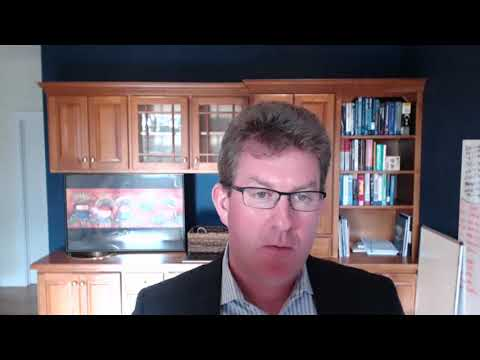

In [277]:
from IPython.display import YouTubeVideo
YouTubeVideo('afO7KEysda8', width=800, height=500)